# EXERCISE 1

## A) Find some data here [1] on people. The goal is to decide if someone buys a computer or not. Derive the best decision tree by calculating a little by hand (Shannon). At least the first split.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Data.csv')
data

,REC,Age,Income,Student,Credit_rating,Buys_computer
0,r1,<=30,High,No,Fair,No
1,r2,<=30,High,No,Excellent,No
2,r3,31...40,High,No,Fair,Yes
3,r4,>40,Medium,No,Fair,Yes
4,r5,>40,Low,Yes,Fair,Yes
5,r6,>40,Low,Yes,Excellent,No
6,r7,31...40,Low,Yes,Excellent,Yes
7,r8,<=30,Medium,No,Fair,No
8,r9,<=30,Low,Yes,Fair,Yes
9,r10,>40,Medium,Yes,Fair,Yes


In [3]:
data['Age'] = data['Age'].map({'<=30': 3, '31...40': 2, '>40': 1})
data['Income'] = data['Income'].map({'High': 3, 'Medium': 2, 'Low': 1})
data['Student'] = data['Student'].map({'Yes': True, 'No': False})
data['Credit_rating'] = data['Credit_rating'].map({'Excellent': 3, 'Fair': 2})
data

,REC,Age,Income,Student,Credit_rating,Buys_computer
0,r1,3,3,False,2,No
1,r2,3,3,False,3,No
2,r3,2,3,False,2,Yes
3,r4,1,2,False,2,Yes
4,r5,1,1,True,2,Yes
5,r6,1,1,True,3,No
6,r7,2,1,True,3,Yes
7,r8,3,2,False,2,No
8,r9,3,1,True,2,Yes
9,r10,1,2,True,2,Yes


In [4]:
def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    return -(vc * np.log(vc)/np.log(2)).sum()

In [5]:
entropies = {}
for column in ['Age','Income','Student','Credit_rating']:
    entropies[column] = pandas_entropy(data[column])
    
dict(sorted(entropies.items(), key=lambda item: item[1], reverse=True))

{'Age': 1.570950594454669,
 'Income': 1.5588718484453605,
 'Credit_rating': 1.0,
 'Student': 0.9927744539878083}

As "Age" has the best information gain, it may be the best column for a first split.

## B) Compare your tree against the tree derived from SciKit Learn as given in the Python example before! Why are they different? Print the tree with Graphviz (can be easily done with WebGraphViz [2])

In [6]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [7]:
features = ['Age','Income','Student','Credit_rating']
classes = ['Yes', 'No']

X = data[features]
y = data['Buys_computer']
 
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

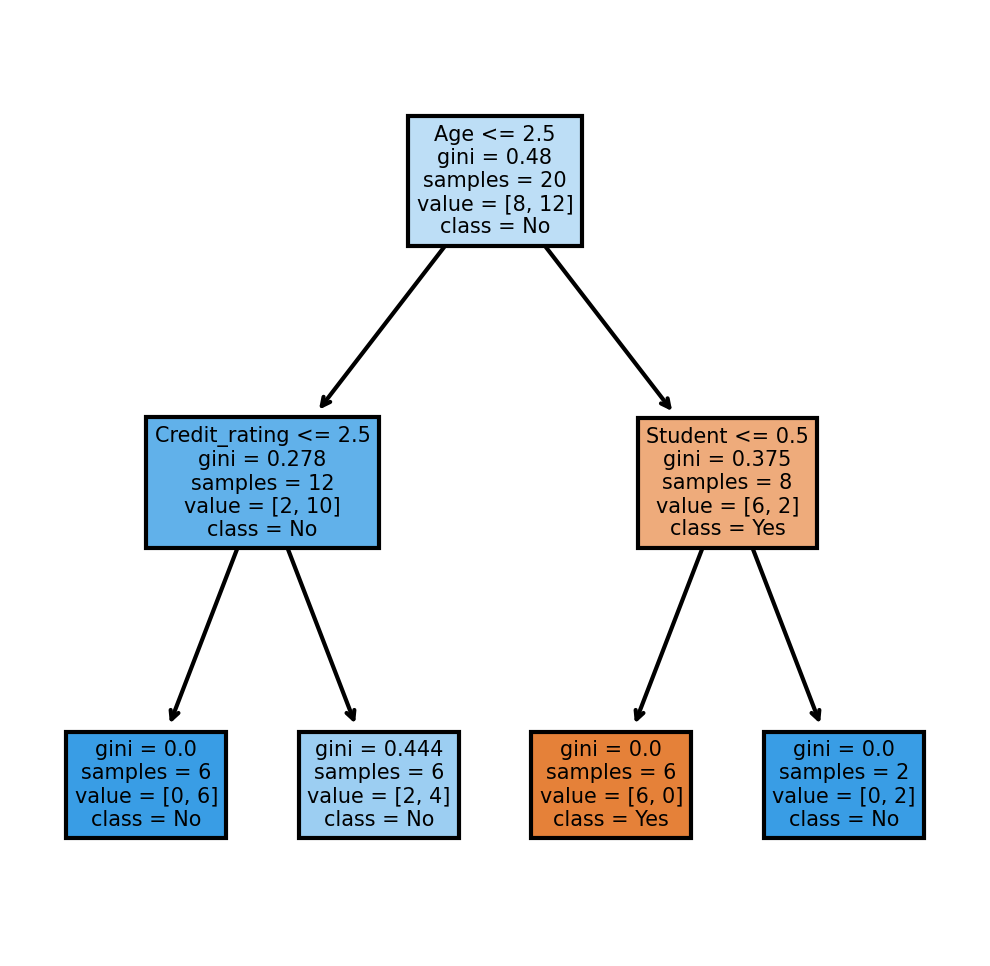

In [8]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_clf,
           feature_names = features, 
           class_names=classes,
           filled = True);